# SIN / COS Approximation

Ping-Pong Postionsberechnung
$$ pp( \vec{x}) \mapsto y$$
mit $$ \vec{x} \in \mathbb{Z}^3$$ und $$y \in \mathbb{Z}$$
und $$ kgV(ping,pong) = 1 $$


In [1]:
function pp(n,ping=3,pong=4) 
    n = n-1 # Start at point 1
    step = 1
    pos = 0
    if gcd(ping,pong) != 1 
        return -1
    end
    for i in 1:n
        pos += step
        if (i%ping==0) !== (i%pong==0)
            step *= -1
        end
    end
    return pos
end

pp (generic function with 3 methods)

### Beispiel mit ping=3 und pong=4


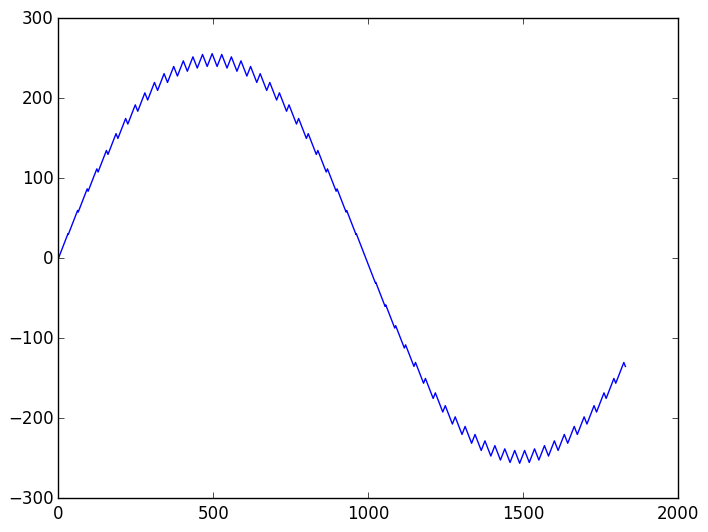

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12bfb3210>

In [41]:
using PyPlot;
ydata = [pp(i,31,32) for i in 1:1830]
plot(ydata)


### Zahlenpare für symmetrisches Ping-Pong Spiel

Gesucht: Alle Zahlenpaare (Ping/Pong) mit der Bedingung, 
dass $$ kgV(ping/pong)=1$$ und $$ggT(ping,pong) \in 2\mathbb{Z}$$
also $$ ping \cdot pong \in 2\mathbb{Z}$$

In [3]:
oG = 13
nmax = 700
ppList = Array{Int8,1}[]
for j in 2:oG
    for k in 2:oG
        if gcd(j,k)==1 && iseven(j*k) 
            tmp=Int8[j,k]
            push!(ppList,tmp)
        end
    end
end

ymap = [pp(n,e[1],e[2]) for n in 1:nmax, e in ppList]
plot(ymap)
print("done")





done

### Es besteht die Vermutung, dass eine möglichst gute Approximation eine grosse Periode hat. 

Also $$ max(ping,pong) $$ 



- Wir wählen also eine Primzahl p als Ping
- und p+1 als Pong



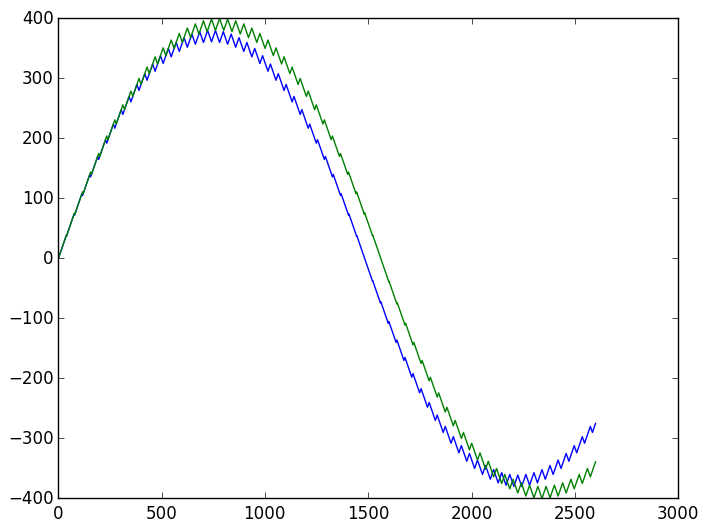

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12518e310>
 PyObject <matplotlib.lines.Line2D object at 0x12518e590>

In [4]:
prim = 39
y = [pp(n,prim,prim+i) for n in 1:2600, i in -1:2:1]
plot(y)

### Wähle als ping eine Primzahl in der Nähe

In [5]:
pri = primes(45)
ping=last(pri)
pong=ping+1
y = [pp(n,ping,pong) for n in 1:2*ping*pong]
plot(y)
 

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x127ca6a10>

Numerische Werte skalieren, damit die Periode 2$\pi$ und die Amplitude 1 wird

In [6]:
pri = primes(33)
ping=last(pri)
pong=ping+1
y = [pp(n,ping,pong) for n in 1:2*ping*pong]
ymax = maximum(y)
y2 = 1.0/ymax*y
x = linspace(0,2*pi,2*ping*pong)
y3 = sin(x)
title("Ping: $(ping) Pong: $(ping+1)")
plot(x, y2,"b-", x,y3,"r-", linewidth=1.0)


2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x127d21ed0>
 PyObject <matplotlib.lines.Line2D object at 0x127d26190>

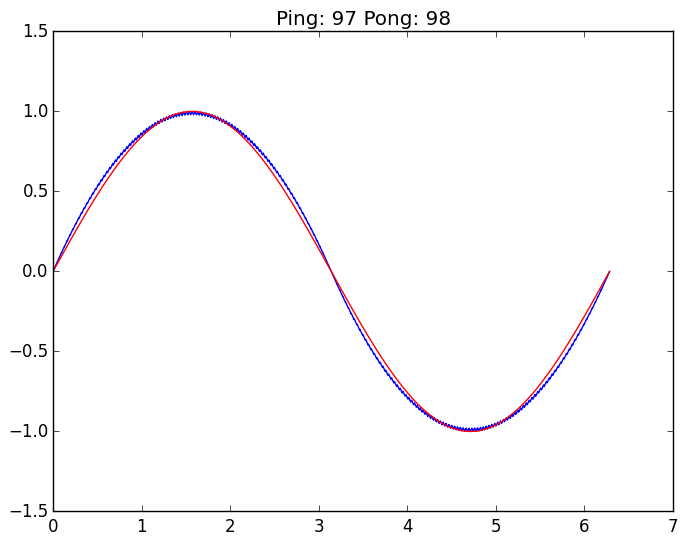

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x127d21e90>
 PyObject <matplotlib.lines.Line2D object at 0x12867e310>

In [7]:
ϵ=0.008
pri = primes(99)
ping=last(pri)
pong=ping+1
y = [pp(n,ping,pong) for n in 1:2*ping*pong]
ymax = maximum(y)
y2 = 1.0/(ymax-ϵ)*y
x = linspace(0,2*pi,2*ping*pong)
y3 = sin(x)
title("Ping: $(ping) Pong: $(ping+1)")
plot(x, y2,"b-", x,y3,"r-", linewidth=1.0)

In [8]:
A = [pp(n) for n in 1:34]

function flatten(A,w=3)
    tmp = size(A)
    l=tmp[1]
    A1 = [A[i] for i in 1:w]
    #print(A1)
    A2 = [sum(A[i-w:i+w])/(2*w+1) for i in w+1:l-w]
    #print (A2)
    A3 = [A[i] for i in l-w+1:l]
    #print(A3)
    return [A1;A2;A3]
    
end


flatten (generic function with 2 methods)

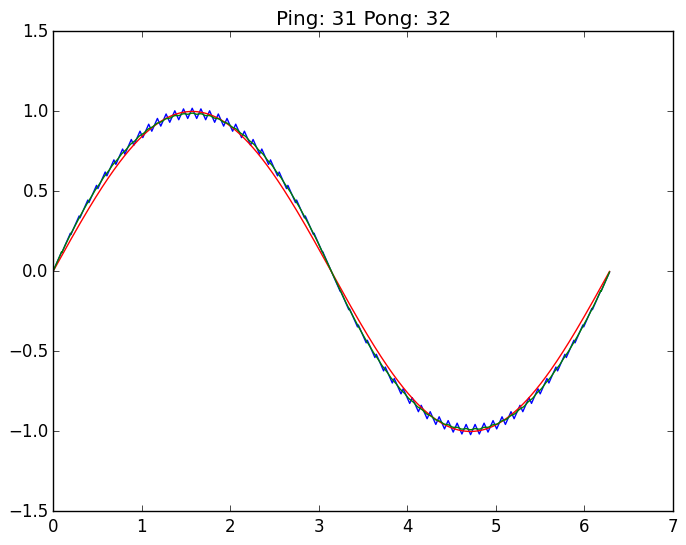

3-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12867e090>
 PyObject <matplotlib.lines.Line2D object at 0x1286b7590>
 PyObject <matplotlib.lines.Line2D object at 0x1286b7c50>

In [9]:
ϵ=5
pri = primes(33)
ping=last(pri)
pong=ping+1
periods=1
y = [pp(n,ping,pong) for n in 1:2*periods*ping*pong]
ymax = maximum(y)
y2 = 1.0/(ymax-ϵ)*y
y4 = flatten(y2,40)
x = linspace(0,2*periods*pi,2*periods*ping*pong)
y3 = sin(x)
title("Ping: $(ping) Pong: $(ping+1)")
plot(x, y2,"b-", x,y3,"r-",x,y4,"g-", linewidth=1.0)

### Fourier Analyse

(249,)(993,)(1984,)

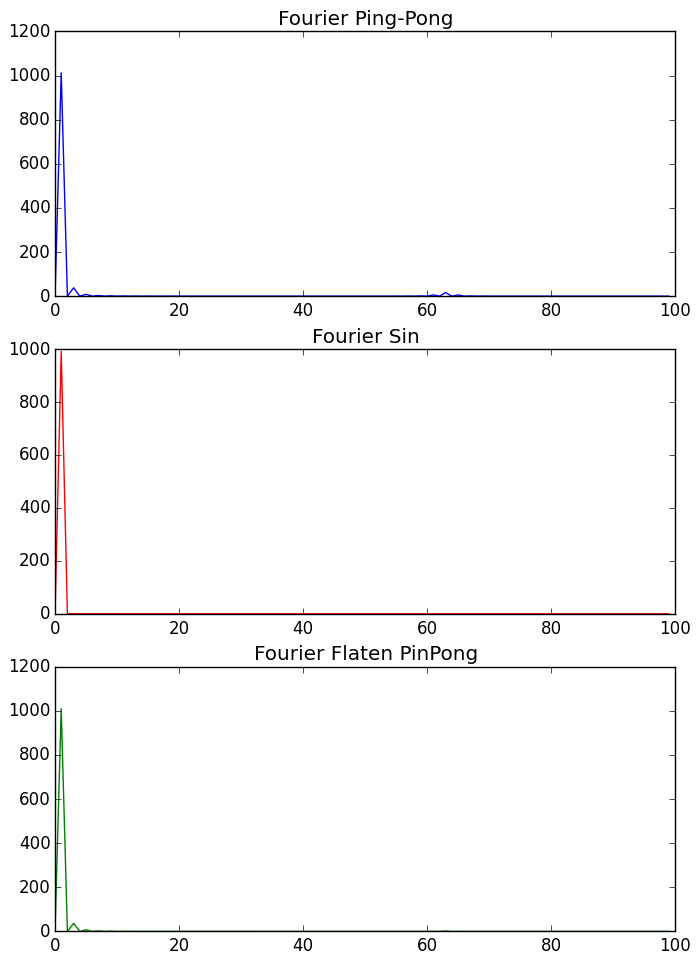

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x127e49a50>

In [10]:
b1 = abs(rfft(y3))
b2 = abs(rfft(y2))
b3 = abs(rfft(y4))

x = linspace(0,2*pi/(ping*pong*periods),int(periods*ping*pong/4)+1)
#ylim((-0.003,0.007))
#plot(b1,"r-",b2,"b-",b3,"g-", linewidth=1.0)
subplots_adjust(top=1.6)
subplot(311)
title("Fourier Ping-Pong")
print(size(x))
print(size(b2))
print(size(y2))


plot(b2[1:100],"b-", linewidth=1.0)

subplot(312)
title("Fourier Sin")
plot(b1[1:100],"r-", linewidth=1.0)

subplot(313)
title("Fourier Flaten PinPong")
plot(b3[1:100],"g-", linewidth=1.0)

### Transformation und Rücktransformation des Signals


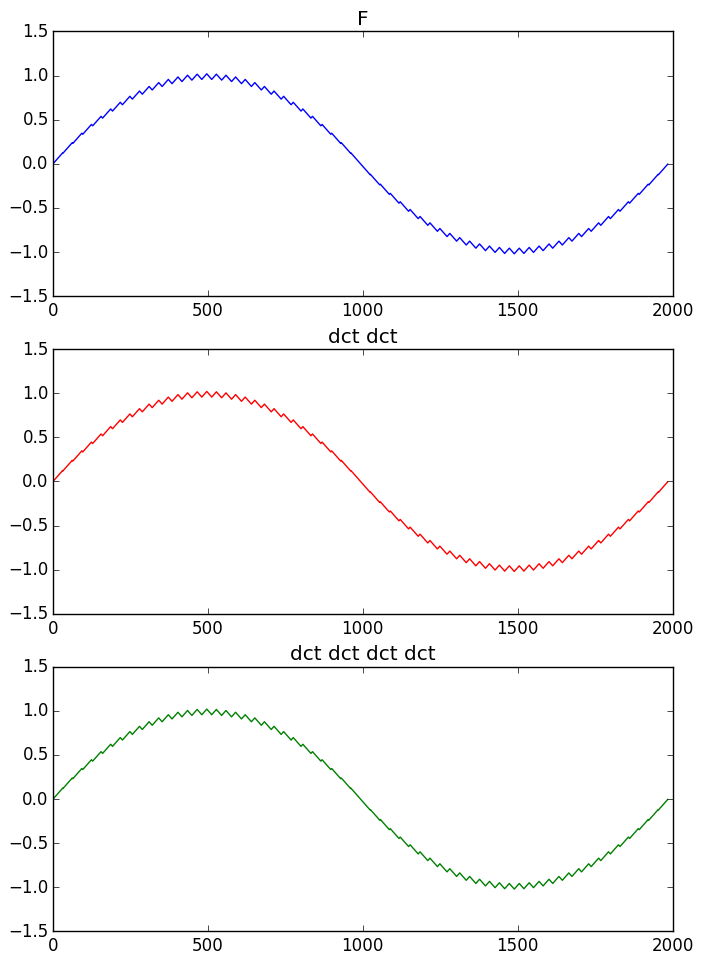

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x124f72f10>

In [11]:
subplots_adjust(top=1.6)
subplot(311)
title("F")
plot(y2,"b-", linewidth=1.0)

subplot(312)
title("dct dct")
plot(idct(dct(y2)),"r-", linewidth=1.0)

subplot(313)
title("dct dct dct dct")
plot(idct(dct(idct(dct(y2)))),"g-", linewidth=1.0)

## Spektrum eines einfachen Sinus

In [12]:
X = rfft(x)
sampRate = N / duration
f = linspace(0, sampRate / 2, int(N / 2) + 1)
magX = abs(X)
plot(f, magX)

LoadError: N not defined
while loading In[12], in expression starting on line 2

### numerische Ableitung


In [13]:
@which (Base.diff([3,4]))

diff(a::AbstractArray{T,1}) at linalg/generic.jl:35

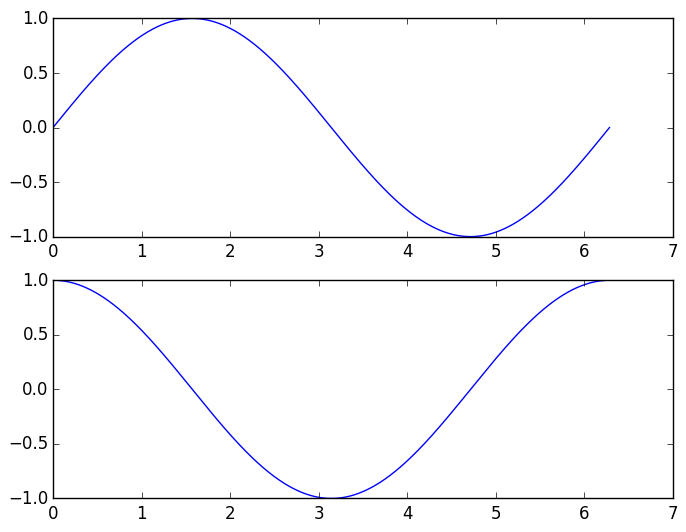

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x11cb38110>

In [14]:
n = size(y3)
x = linspace(0,2π,n[1])
dy = diff(y3)
dx = diff(x)
dydx =dy./dx


subplot(211)
plot(x,y3)
subplot(212)
plot(x[2:end],dydx)

## einfache numerische Ableitung

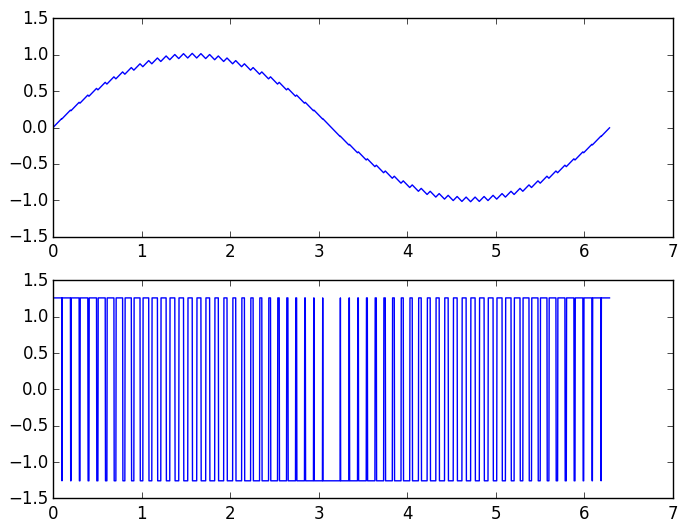

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x11cb60390>

In [15]:
n = size(y2)
x = linspace(0,2π,n[1])
dy = diff(y2)
dx = diff(x)
dydx =dy./dx


subplot(211)
plot(x,y2)
subplot(212)
plot(x[2:end],dydx)

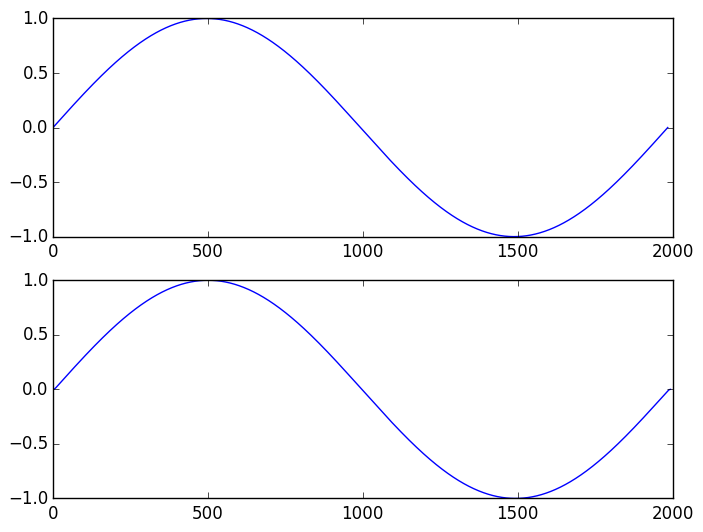

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x129816750>

In [16]:
#ga = [exp(-((t-π)^2/1))::Float64 for t in x]
N = 10 
ga = [(1/N)::Float64 for i in 1:N]
y5 = conv(y3,ga)

subplot(211)
plot(y3)
subplot(212)
plot(y5)





16.019841983.0

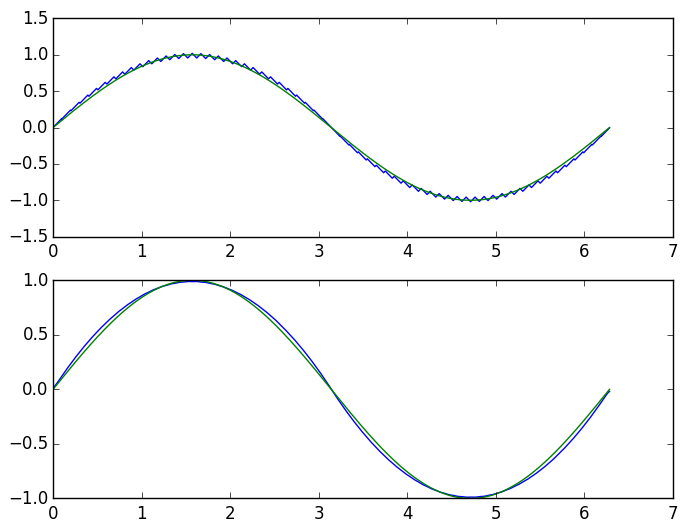

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x129c27750>
 PyObject <matplotlib.lines.Line2D object at 0x129c279d0>

In [17]:
n = size(y2)
x = linspace(0,2π,n[1])
N = 33
ga = [(1/N)::Float64 for i in 1:N]
y5 = conv(ga,y2)

n2=size(y5)
d = (n2[1]-n[1])/2
y6 = y5[d+1:n[1]+d]

print(d)
subplot(211)
plot(x,y2,"b-",x,sin(x),"g-")
subplot(212)
print(n[1])
print(n[1]+d-d-1)

plot(x,y6,"b-",x,sin(x),"g-")






gefaltete Kurve numerisch ableiten


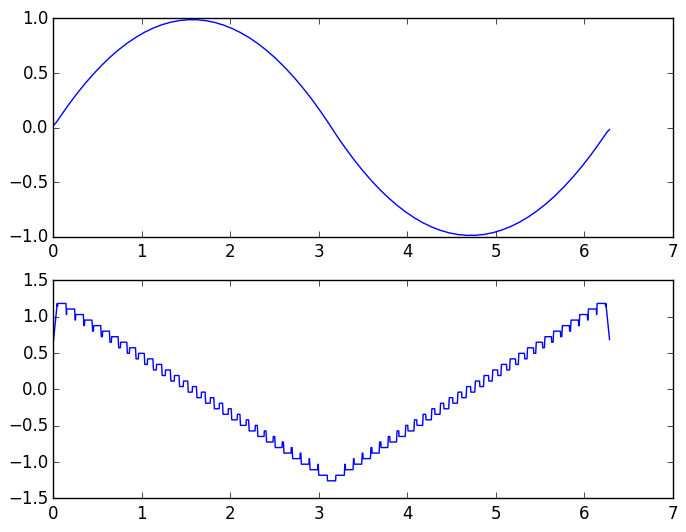

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x129dec850>

In [18]:
n = size(y6)
x = linspace(0,2π,n[1])
dy = diff(y6)
dx = diff(x)
dydx =dy./dx


subplot(211)
plot(x,y6)
subplot(212)
plot(x[2:end],dydx)

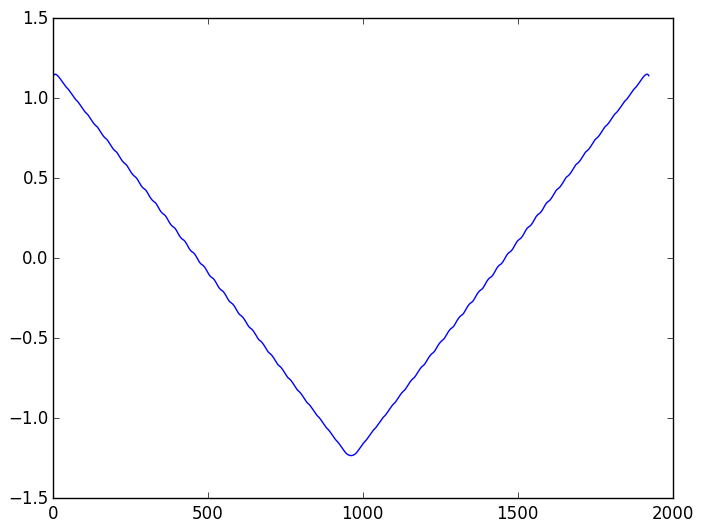

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12a1a29d0>

In [19]:
k=61
le = size(y6)[1]
df = [ linreg(x[i:k+i],y6[i:k+i])[2] for i in 1:le-k]
plot(df)

Die sinus Approximaiton mit Ping-Pong ändert ihre Steigung gleichmässig

Periodische Dreiecksfunktion width = 4

$$ f(x) = \begin{cases} (x-2) \mod 4 &\mbox{if floor }((x-2)/4) \mbox{ is even} \\ 
-(x-2) \mod 4 &\mbox{if floor }((x-2)/4) \mbox{ is odd}  
\end{cases}$$


Prinzip Funktionsgenerator

Bei einem Funktionsgenerator wird eine Dreieckschwingung durch nichtlineare Bauteile in eine mehr oder minder gute Sinusschwingung umgeformt.

http://www.itwissen.info/definition/lexikon/Funktionsgenerator-function-generator.html

Technisch betrachtet ist das Herzstück eines Funktionsgenerators ein Rechteckgenerator. Durch Integration der Ausgangsspannung erzeugt man ein Dreicksignal und daraus, durch langsame Amplitudenbegrenzung mittels Shaping, das Sinussignal.

In [20]:
function tri2(x,width=pi)
    step = int(floor((x-width/2)/width))
    if iseven(step)
        return((x-width/2)%width-width/2*sign(x-width/2))/pi*2.5
    else
        return(-(x-width/2)%width+width/2*sign(x-width/2))/pi*2.5
    end
end

tri2 (generic function with 2 methods)

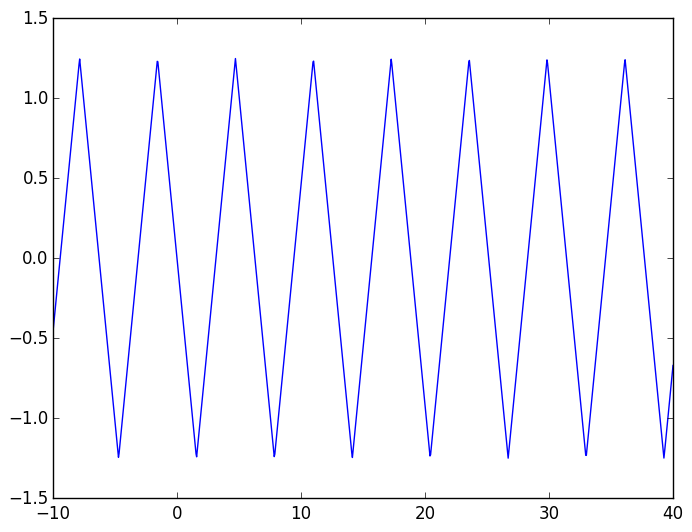

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12a3c4850>

In [21]:
N = 1024
x = linspace(-10,40,N)
y = [tri2(t) for t in x]
plot(x,y)

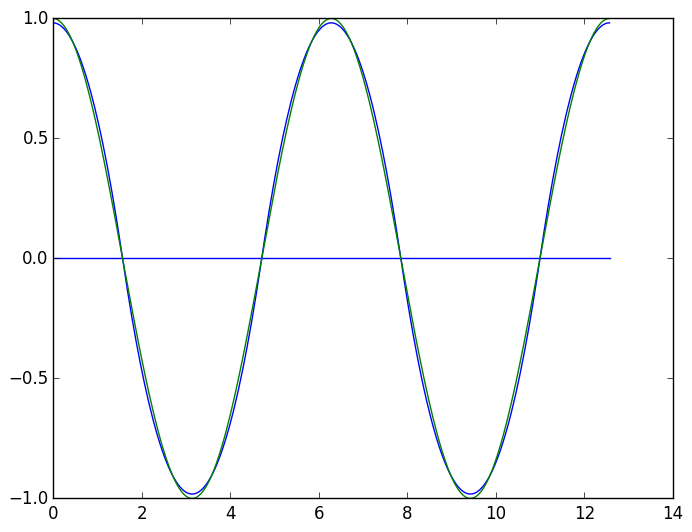

3-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12a563d10>
 PyObject <matplotlib.lines.Line2D object at 0x12a563f90>
 PyObject <matplotlib.lines.Line2D object at 0x12a567210>

In [22]:
N=256
x = linspace(0,4*pi,N)
y = [quadgk(tri2,-1/2*pi,t) for t in x]
y2 = [cos(t) for t in x] 
plot(x,y,"b-",x,y2,"g-")


In [23]:
function tri(x,width=4)
    faltung = int(floor(x/width))
    #print(faltung)
    #print("\n")
    value = x%width
    #print(value)
    if x >= 0
        if iseven(faltung)
            return value
        else
            return width-value
        end
    else
        if iseven(faltung)
            return width+value
        else
            return -value
        end
    end
end

function simtri(x,width=4)
    return (tri(x+2,width)-width/2)/(width/2)
end

simtri (generic function with 2 methods)

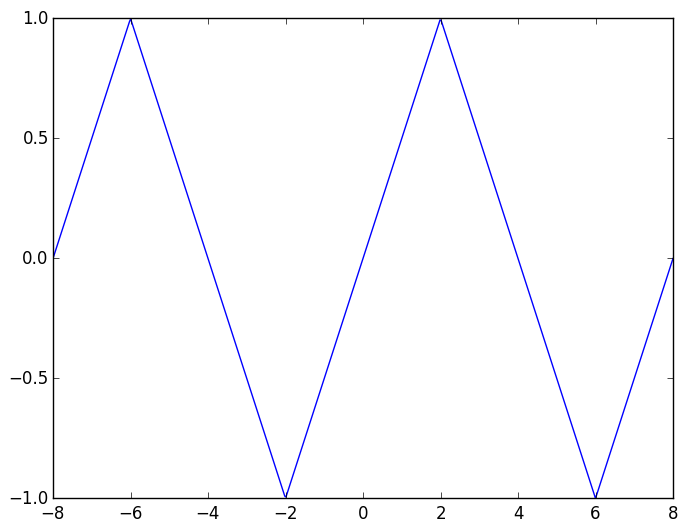

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12a707d50>

In [24]:
N=512
x = linspace(-8,8,N)
y = [simtri(t) for t in x]
plot(x,y)

numeric Integration


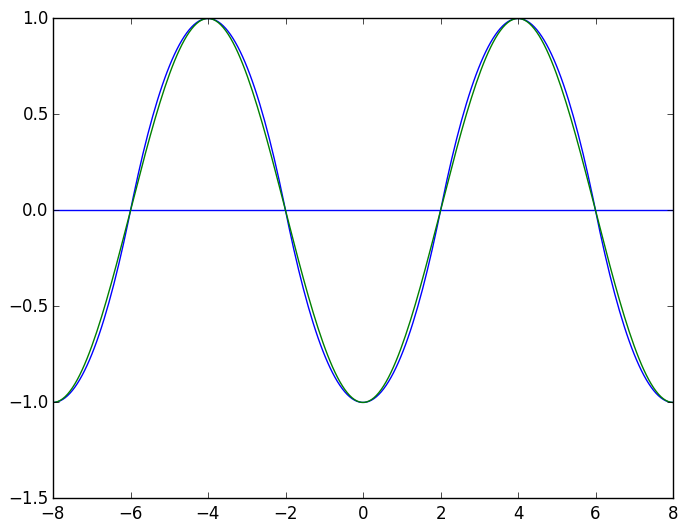

3-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12a8ae810>
 PyObject <matplotlib.lines.Line2D object at 0x12a8aea90>
 PyObject <matplotlib.lines.Line2D object at 0x12a8aecd0>

In [25]:
N=256
x = linspace(-8,8,N)
y = [quadgk(simtri,-2,t) for t in x]
y2 = [-cos(pi/4*t) for t in x] 
plot(x,y,"b-",x,y2,"g-")


In [26]:
function block(x,sc=1,val=8)
    return (abs(fld(x-sc/2,sc)%2)-0.5)*val*-1
end

function numint(x,left,right)
    N = size(x)[1]
    dx = (right-left)/N
    sum = 0
    out = [sum += x[i]*dx for i in 1:N]  
    out2 = copy(out)
    unshift!(out2,0)
    tmp = pop!(out2)
    return (out+out2)/2
end
    

numint (generic function with 1 method)

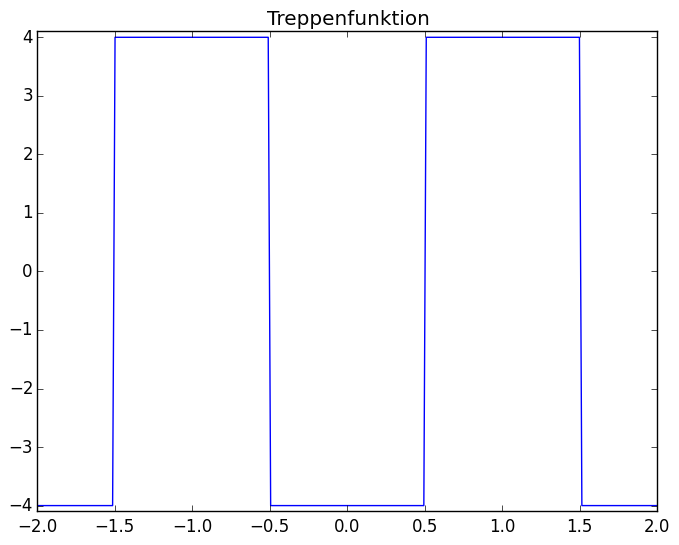

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12aa4d210>

In [27]:
using PyPlot;
N=256
a=-2
b=2
x = linspace(a,b,N)
y = [block(t)  for t in x]
title("Treppenfunktion")
axis([a,b,-4.1,4.1])
plot(x,y,"b-")


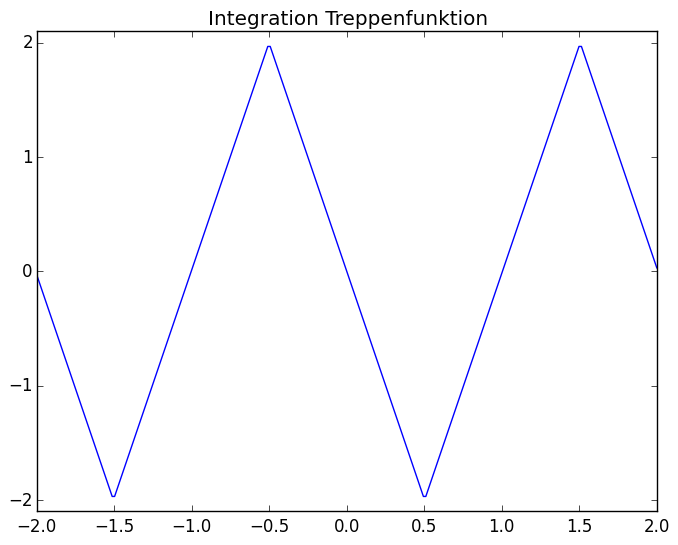

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12aa88fd0>

In [28]:
x = linspace(a,b,N)
y2 = numint(y,a,b)
title("Integration Treppenfunktion")
axis([a,b,-2.1,2.1])
plot(x,y2,"b-")



In [29]:
#@pyimport matplotlib.colors

x = linspace(a,b,N)
y3 = (numint(y2,a,b)+0.5)*2
y5 = [cos(t*1*π) for t in x] 
title("Integration Integration Treppenfunktion")
axis([a,b,-1.1,1.4])
plot(x,y3,"b-",label="integration Dreieck")
plot(x,y5,"g-",label="cos(πt)")
legend()

PyObject <matplotlib.legend.Legend object at 0x12adc4d90>

Funktionsgenerator aus OP-Verstärker bauen. Elektronik:
Integrierer [http://www.homofaciens.de/technics-base-circuits-function-generator_ge_navion.htm](http://www.homofaciens.de/technics-base-circuits-function-generator_ge_navion.htm) 

Tutorial [http://www.vidqt.com/sb/kfg0qmMkmEk?lang=de](http://www.vidqt.com/sb/kfg0qmMkmEk?lang=de)




zusammen gesetzte periodische Funktion 

$$ f(x) = \begin{cases} (x-0-4n)^{\frac{7}{4}} &\mbox{für } 0+4 \cdot n < x < 1+4 \cdot n  \mbox{  für  } n \in \mathbb{Z} \\ 
2-(-x+2+4n)^{\frac{7}{4}} &\mbox{für } 1+4 \cdot n < x < 2+4 \cdot n  \mbox{  für  } n \in \mathbb{Z} \\ 
2-(x-2-4n)^{\frac{7}{4}} &\mbox{für } 2+4 \cdot n < x < 3+4 \cdot n  \mbox{  für  } n \in \mathbb{Z} \\
(-x+4+4n)^{\frac{7}{4}} &\mbox{für } 3+4 \cdot n < x < 4+4 \cdot n  \mbox{  für  } n \in \mathbb{Z} 
\end{cases}$$




Einfacher (geht jedoch nicht mit 7/4)

$$ f(x) = \begin{cases} (x-4n)^2 &\mbox{für } -1+4 \cdot n < x < 1+4 \cdot n  \mbox{  für  } n \in \mathbb{Z} \\ 
2-(x-2-4n)^2 &\mbox{für } 1+4 \cdot n < x < 3+4 \cdot n  \mbox{  für  } n \in \mathbb{Z} 
\end{cases}$$







In [30]:
function sinapprox(x,exp_=7/4)
    # 2pi -> 4
    x = x/π⋅2
    #shift 90° for sin
    x = x+1
    out=0
    if x<0
        x = -1*x
    end
    x_ = x%4
    if x_ <1
       out= x_^exp_
    end
    if 1 <= x_ <2
       out= 2-(2-x_)^exp_
    end
    if 2 <= x_ < 3
       out= 2-(x_-2)^exp_
    end
    if 3 <= x_ <4
       out= (4-x_)^exp_
    end
    return out-1.0
end




sinapprox (generic function with 2 methods)

In [31]:
function cosapprox(x,exp_=7/4)
    return sinapprox(x+π/2,exp_)
end

cosapprox (generic function with 2 methods)

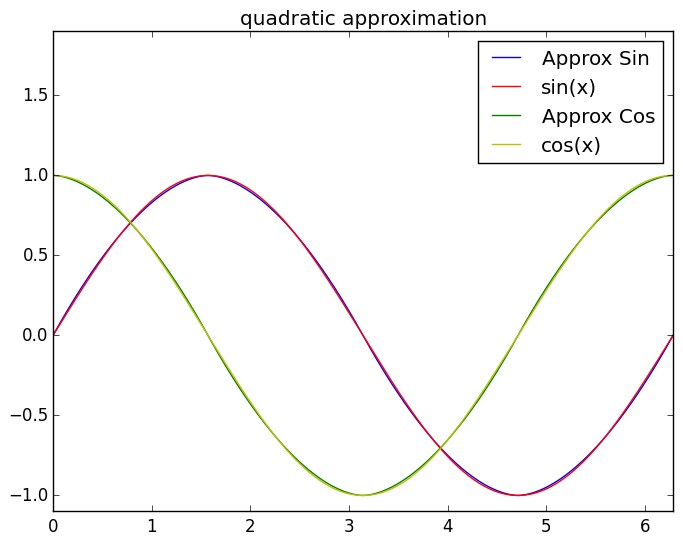

PyObject <matplotlib.legend.Legend object at 0x12af71dd0>

In [32]:
using PyPlot;
N=512
a=-0π
b=2*π
x = linspace(a,b,N)
y = [sinapprox(t)  for t in x]
#y_ = [sinapprox(t,exp_)  for t in x]
y2 = [sin(t) for t in x]
y3 = [cosapprox(t) for t in x]
y4 = [cos(t) for t in x]
title("quadratic approximation")
axis([a,b,-1.1,1.1])
plot(x,y,"b-",label="Approx Sin")
#plot(x,y_,"g-",label="Approx Sin exp= $exp_")
plot(x,y2,"r-",label="sin(x)")
#plot(x,y5,"c-",label="approx 2 + 1.6")
plot(x,y3,"g-",label="Approx Cos")
plot(x,y4,"y-",label="cos(x)")
axis([a,b,-1.1,1.9])
legend()

In [33]:
using PyPlot;
N=512
a=0
b=2π
T = linspace(a,b,N)
x = [cosapprox(t)  for t in T]
y = [sinapprox(t)  for t in T]
x2 = [cos(t)  for t in T]
y2 = [sin(t) for t in T]

title("Parametric Plot sin / cosin")
axis([a,b,-1.1,1.1])
plot(x,y,"b-",label="Approx Circle 2")
plot(x2,y2,"r-",label="sin/cos Circle")
axis([-1.1,1.6*1.1,-1.1,1.1])
legend()

PyObject <matplotlib.legend.Legend object at 0x12b142fd0>

wo steckt die Transistenz?

Quelle zu Sin
[http://wwwuser.gwdg.de/~subtypo3/gdz/pdf/PPN599415665_0040/LOG_0003.pdf](http://wwwuser.gwdg.de/~subtypo3/gdz/pdf/PPN599415665_0040/LOG_0003.pdf)